<center> <h5>Wintersemester 2024/25</h5> </center>
<center> <h1>Medizinische Bildanalyse</h1> </center>
<center> <h3>Aufgabenblatt 6</h3> </center>
<center> <h5>18. November 2024</h5> </center>
<center> <h5>
    Prof. Dr. Thomas Schultz, 
    <a href = "mailto: jlen@uni-bonn.de">Jonathan Lennartz</a>,
    <a href = "mailto: jgruen@uni-bonn.de">Dr. Johannes Grün</a>
</h5> </center>
<center> <h5>Abgabefrist: <b>25.11.2024, 10:00 Uhr, via eCampus</b></h5> </center>

* Bei Fragen bezüglich der Aufgaben nutzt das Forum in eCampus
* Die Aufgaben können in Gruppen von **bis zu drei** Studierenden abgegeben werden (eine Abgabe pro Gruppe). Findet euch dazu auf eCampus in Teams zusammen.
* Ladet die Abgaben in einem Zip-Archiv hoch. Es sollte das Notebook selbst, einen Export als HTML oder PDF und alle nötigen Datein enthalten, um die Ergebnisse zu reproduzieren. 


### Aufgabe 1 (Algebraische Rekonstruktion, 23 Punkte)

In vielen bildgebenden Verfahren wird die algebraische Rekonstruktion verwendet, um aus den Messungen das ursprüngliche Bild zu rekonstruieren. Dabei wird ausgenutzt, dass die Messung als Linearkombination von Pixelwerten $x_i$ geschrieben werden kann:

$
A x = b,
$

wobei $A \in \mathbb{R}^{n \times m}$ die Systemmatrix ist, $b \in \mathbb{R}^n$ die Messwerte und $x \in \mathbb{R}^m$ das rekonstruierte Bild. Bild und Messung werden hierfür in einen Vektor umgeformt. In der Regel sind die Systemmatrizen schlecht konditioniert, was die Lösung im Sinne der kleinsten Quadrate (per Least Squares) instabil machen kann. Außerdem werden die Matrizen schnell so groß, dass sie nicht mehr in den Arbeitsspeicher passen. Eine mögliche Lösung für dieses Problem ist der Einsatz iterativer Verfahren, wie zum Beispiel des Kaczmarz-Algorithmus.
 

#### a) Implementierung des Kaczmarz-Algorithmus (4 Punkte)

Der Kaczmarz-Algorithmus ist ein iteratives Verfahren zur Lösung linearer Gleichungssysteme. Beginnend mit einem Startvektor, z.B. $x_0=0$, wird die aktuelle Näherungslösung in jeder Iteration im Hinblick auf jeweils eine Zeile des Gleichungssystems verbessert. Daher muss nicht die komplette Matrix auf einmal im Speicher verfügbar sein. Eine einfache Variante des Verfahrens verfeinert die angenäherte Lösung $x_k$ aus der $k$-ten Iteration durch Anwendung der Formel

$$
x_{k+1} = x_k + \frac{b_i - A_i^T x_k}{\| A_i \|^2} A_i,
$$

wobei zyklisch über die einzelnen Gleichungen iteriert wird, d.h. $ i = (k \mod n) $, $ b_i \in \mathbb{R}$ ist der $i$-te Eintrag von $b$ und $A_i \in \mathbb{R}^m$ die $ i $-te Zeile der Matrix $A$.

Implementiert diesen Algorithmus als Python-Funktion `solve_kaczmarz`, die eine Lösung zurückgibt, sobald ein geeignetes Abbruchkriterium erreicht wurde, sich insbesondere die Lösung $x$ nach $n$ Iterationen nur noch wenig verändert hat (L2-Norm) oder eine vorgegebene Zahl von Iterationen erreicht wurde. Wendet Eure Funktion auf die gegebene Matrix $A$ und den Vektor $b$ an und vergleicht das Ergebnis mit der Lösung, die wir mit `numpy.linalg.lstsq` erhalten. 

In [3]:
import numpy as np 

def solve_kaczmarz(A, b, X, eps=1e-3, max_iter=200):
    n, m = A.shape
    k = 0

    x = []
    x.append(np.zeros(m))

    while k < max_iter:
        i = k % n

        num = b[i] - np.dot(np.transpose(A[i,:]), x[k])
        denom = np.linalg.norm(A[i,:], ord=2) ** 2

        x_next = x[k] + (num / denom) * A[i,:]

        if np.linalg.norm(x_next - x, ord=2) < eps:
            break

        x.append(x_next)
        k += 1

    return x


In [4]:
A = np.array([[-4, 1], [2, 0.5], [3, 1.5], [0, 1]])
b = np.array([-2, 3, 6, 2.])
x_kaczmarz = solve_kaczmarz(A, b, np.zeros(2))
x_np = np.linalg.lstsq(A, b, rcond=None)

print("Kaczmarz:", x_kaczmarz[-1])
print("Numpy:", x_np[0])

Kaczmarz: [1. 2.]
Numpy: [1. 2.]


#### b) Visualisierung des Kaczmarz-Algorithmus (5 Punkte)

<img alt="Reference" src="kaczmarz.png" width="45%">

Abbildung 1: Visualisierung des iterativen Kaczmarz-Algorithmus.

Um den Kaczmarz-Algorithmus besser zu verstehen, können wir in unserem Beispiel jeden Vektor $x_k$ als Punkt in der Ebene darstellen. Die Menge aller Lösungen der $i$-ten Gleichung bildet dann jeweils eine Gerade. Da unser Gleichungssystem zwar überbestimmt, aber konsistent ist, d.h. trotzdem eine exakte Lösung zulässt, schneiden sich diese Geraden in einem Punkt, der der Lösung des Gleichungssystems entspricht.

Wir können die Funktionsweise des Kaczmarz-Algorithmus veranschaulichen, indem wir die Näherungslösungen $x_k$ als Punkte in das Diagramm einzeichnen und aufeinander folgende Werte miteinander verbinden. Erzeugt selbst eine entsprechende Visualisierung; das Ergebnis sollte ähnlich aussehen wie Abbildung 1.


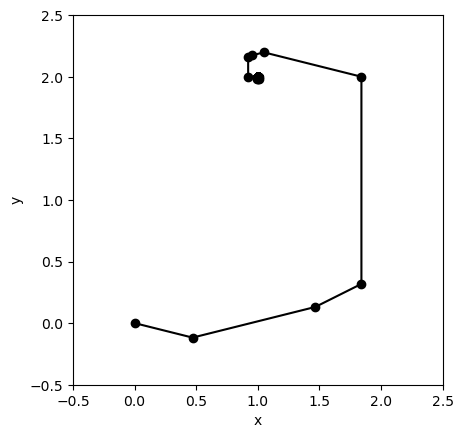

In [5]:
# Lösung
import matplotlib.pyplot as plt

def visualize_kaczmarz(x_kaczmarz):
    x_vals = [x[0] for x in x_kaczmarz]
    y_vals = [x[1] for x in x_kaczmarz]

#    colors = [ "blue", "orange", "green", "red" ]

#    for i in range(1, A.shape[0]+1):
#        plt.axline(x_kaczmarz[i], x_kaczmarz[i+A.shape[0]], c=colors[i-1])


    plt.plot(x_vals, y_vals, c="black")
    plt.scatter(x_vals, y_vals, c="black")

    plt.axis("square")
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 2.5)

    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()


x_kaczmarz = solve_kaczmarz(A, b, np.zeros(2))
visualize_kaczmarz(x_kaczmarz)

#### c) Erläuterung des Kaczmarz-Algorithmus (3 Punkte)

Wie in Abbildung 1 zu sehen liegen ab der ersten Iteration $k=1$ alle Punkte $x_k$ auf einer der Geraden. Im drei- oder höherdimensionalen Fall liegen sie entsprechend auf einer (Hyper-)Ebene. Erläutert kurz, warum das so ist.

Wir bestimmen die Lösung des Gleichungssystems, in der iten Zeile der Matrix A. Diese Lösung ist ein Punkt, der auf der Geraden liegt, die durch die Lösung des Gleichungssystems definiert ist. 

#### d) Relaxation für inkonsistente Gleichungssyteme (3 Punkte)

In der Bildgebung erhalten wir in der Regel überbestimmte Gleichungssysteme, für die es aufgrund des Messrauschens keine exakte Lösung gibt. Probiert anhand der unten vorgegebenen Werte aus, wie sich der Kaczmarz-Algorithmus in einem solchen Fall verhält. Visualisiert die Ergebnisse mit Eurer Funktion aus b).

Um die Konvergenz in solchen Fällen zu verbessern wird das auf $x_k$ addierte Update häufig mit einem Dämpfungsparameter $\lambda_k<1$ herunterskaliert. Passt Euren Code entsprechend an und vergleicht das Ergebnis (auch wieder graphisch) mit dem vorherigen, unregularisierten Ergebnis. Nutzt dabei $\lambda_k = 0.9^p$, wobei Ihr mit $p=0$ beginnen und $p$ jedes Mal um eins erhöhen könnt, nachdem einmal über alle Zeilen iteriert wurde. 

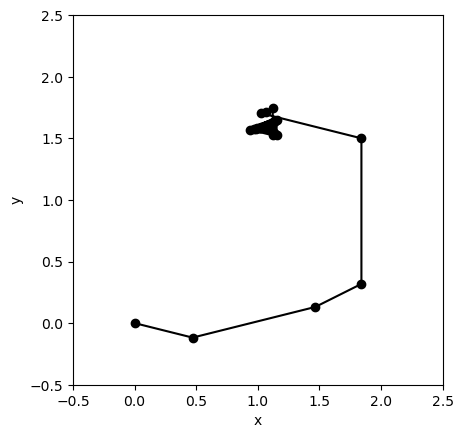

[1.06394883 1.59673473]


In [6]:
A = np.array([[-4, 1], [2, 0.5], [3, 1.5], [0, 1]])
b = np.array([-2, 3, 6, 1.5])

# Lösung:
def solve_kaczmarz_v2(A, b, X, eps=1e-3, max_iter=200):
    n, m = A.shape
    k = 0

    x = []
    x.append(X)

    p = 0

    while k < max_iter:
        i = k % n

        num = b[i] - np.dot(np.transpose(A[i,:]), x[k])
        denom = np.linalg.norm(A[i,:], ord=2) ** 2

        x_next = x[k] + (0.9 ** p) * (num / denom) * A[i,:]

        if np.linalg.norm(x_next - x, ord=2) < eps:
            break

        x.append(x_next)
        k += 1

        if i == n - 1:
            p += 1

    return x

x_kaczmarz_2 = solve_kaczmarz_v2(A, b, np.zeros(2))
visualize_kaczmarz(x_kaczmarz_2)

print(x_kaczmarz_2[-1])

#### e) Kaczmarz-Algorithmus in der Tomographie (4 Punkte)
Bisher sind wir davon ausgegangen, dass wir die Koeffizienten der Systemmatrix kennen, die unsere Messung beschreibt, und dass wir sie zur Bildrekonstruktion zeilenweise in den Arbeitsspeicher laden. Tatsächlich genügt es, wenn statt dessen ein Projektionsoperator $F(x_k;\theta,s)$ zur Verfügung steht, der aus der angenäherten Rekonstruktion $x_k$ durch Berechnung des Linienintegrals entlang $(\theta,s)$ einen Messwert vorhersagt. Außerdem benötigen wir noch ein Bildupdate $U(x_k,\alpha;\theta,s)$, mit dem wir einen Wert $\alpha$ auf die Pixel entlang der Gerade $(\theta,s)$ "verteilt" auf das Bild vorherige Bild $x_k$ addieren können.
Beschreibt, z.B. durch Pseudocode, wie man allein mit diesen beiden Operationen mit dem Kaczmarz-Algorithmus aus gegebenen Messwerten ein Bild rekonstruieren kann.

_Lösung:_
1. Bestimme Aktuelles Linienintegral $F(x_k;\theta,s)$
2. Berechne Fehler zum tatsächlichen Messwert $b_i - F(x_k;\theta,s)$
3. Berechne neues Alpha $U(x_k,\alpha;\theta,s)$ 
4. Addiere neues Alpha auf das Bild $x_k$


#### f) Algebraische Rekonstruktion in der Praxis (4 Punkte) 

Eine praktische Implementierung der algebraischen Rekonstruktion steht in der Funktion `iradon_sart` des Python-Pakets `skimage` zur Verfügung. Nutzt sie um aus den Dateien `sinogram-clean.npz` und `sinogram-noisy.npz` jeweils ein $400\times 400$ Pixel großes Bild zu rekonstruieren.
`iradon_sart` nutzt einen simultanen Ansatz, der für jede Richtung alle Messungen gleichzeitig berücksichtigt und nach einem Durchlauf terminiert. Verfeinert die Rekonstruktion durch wiederholte Aufrufe, die Ihr statt mit einem leeren Bild mit dem Ergebnis des jeweils vorherigen Aufrufs initialisiert. Verbessert sich das rekonstruierte Bild hierdurch Eurem Eindruck nach? Hängt Eure Antwort von dem Rauschniveau der Messungen ab?

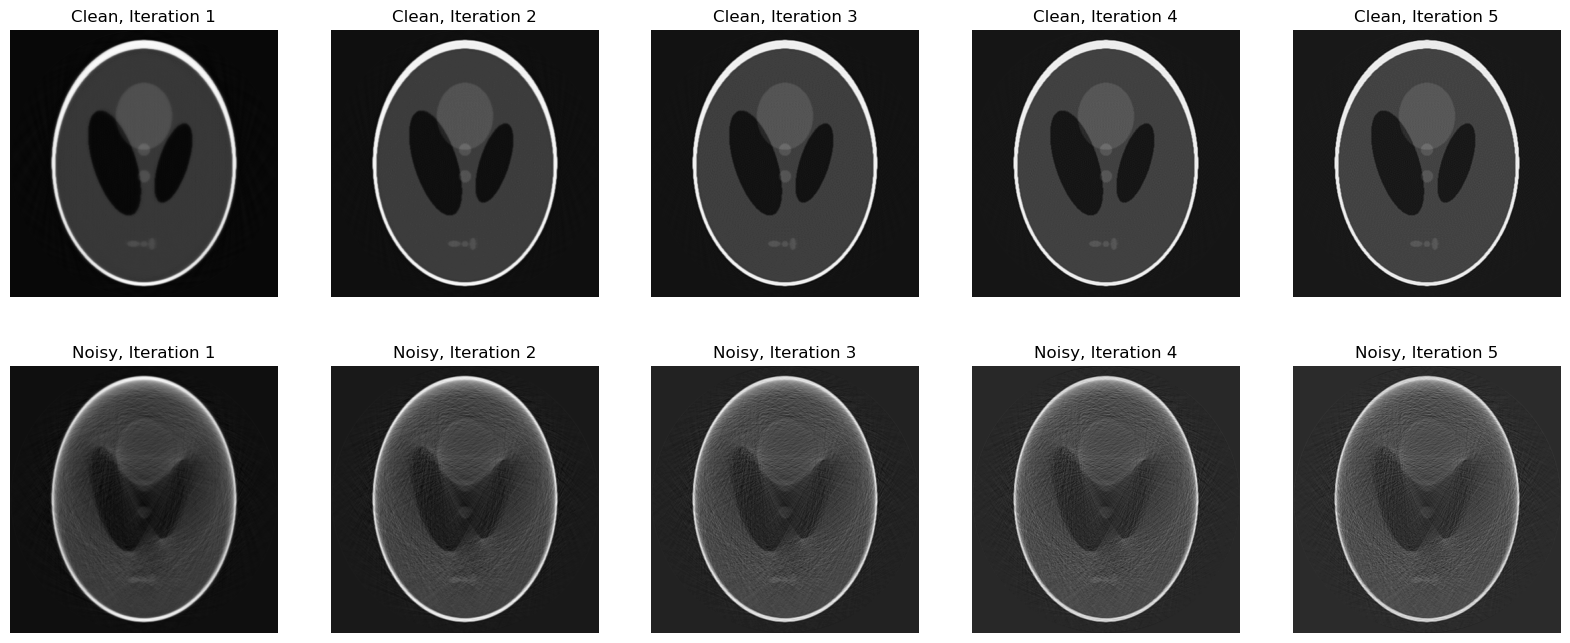

In [7]:
import skimage as ski

sinogram_clean = np.load("sinogram-clean.npy")
sinogram_noisy = np.load("sinogram-noisy.npy")

n = 5

img_clean = np.zeros((sinogram_clean.shape[0], sinogram_clean.shape[0]))
img_noisy = np.zeros((sinogram_noisy.shape[0], sinogram_noisy.shape[0]))

fig, axes = plt.subplots(2, n)

fig.set_figwidth(20)
fig.set_figheight(8)

for i in range(n):
    img_clean = ski.transform.iradon_sart(sinogram_clean, image=img_clean)
    img_noisy = ski.transform.iradon_sart(sinogram_noisy, image=img_noisy)

    axes[0, i].imshow(img_clean, cmap="gray")
    axes[0, i].axis("off")
    axes[0, i].set_title(f"Clean, Iteration {i+1}")

    axes[1, i].imshow(img_noisy, cmap="gray")
    axes[1, i].axis("off")
    axes[1, i].set_title(f"Noisy, Iteration {i+1}")

plt.show()

### Aufgabe 2 (Vergleich von CT und MRT, 12 Punkte)
Stellt für jede der folgenden Behauptungen fest, ob sie auf CT, MRT, beides, oder keins von beidem zutrifft. Für die korrekte Antwort gibt es je einen Punkt, für eine kurze Erläuterung jeweils zwei weitere.

a) Der Bildkontrast eines Gewebes steht in unmittelbarem Zusammenhang mit seiner Dichte.

_Antwort:_
Es trifft auf MRT zu, hier können Weichgewebe und Organe besonders Kontrastreich dargestellt werden. MRT basiert auf der Schwingung von Wasser, da Wasser in Geweben viel vorhanden ist, ist es hier besonders effektiv. Gewebe blocken allerdings quasi keine Strahlung und sind daher im CT schlecht zu erkennen. 

b) Kombinierte Hybridgeräte ermöglichen es, mittels PET und dieser Bildmodalität strukturelle und funktionelle Bilder zu fusionieren.

_Antwort:_
Trifft auf beides zu. Man kann es bei beiden Technologien hintereinander durchführen, siehe Folie 63/64. 

c) Es kommen Gamma-Kameras zum Einsatz, die um den Patienten rotiert werden.

_Antwort:_
Wir müssen bei CT Strahlung detektieren, also brauchen wir Gamma-Kameras. Bei MRT wird keine Strahlung verwendet. 

d) Es ist unbedingt darauf zu achten, keine ferromagnetischen Gegenstände in den Untersuchungsraum mitzunehmen.

_Antwort:_ 
Bei MRT wird ein sehr starkes Magnetfeld erzeugt wird, wäre es unvorteilhaft ferromagnetische Gegenstände mitzunehmen. CT hat nichts mit Magnetfeldern zu tun.

### Aufgabe 3 (Bildstörungen im Frequenzraum, 15 Punkte)
In der MRT-Bildgebung können bestimmte Bildstörungen im Frequenzraum auftreten. Auch wenn wir erst in der nächsten Woche genauer begründen warum das so ist, könnt Ihr Euch bereits jetzt mit Euren Kenntnissen aus Kapitel 2 und Blatt 3 klar machen, wie sich bestimmte Artefakte im Frequenzraum auf ein durch Rücktransformation gewonnenes Bild auswirken.

a) Erklärt kurz, wie es sich auf ein Bild auswirkt, wenn ein einzelner Punkt im Frequenzraum durch einen viel zu hohen Wert ersetzt wird. Illustriert Eure Antwort, indem ihr das Bild ```brain.png``` Fourier-transformiert, entsprechend stört, und den Betrag (Magnitudenbild) der Rücktransformierten visualisiert. (5P)

_Antwort und Lösung:_
Ein einzelner Punkt im Frequenzraum entspricht einer Welle im Bildraum. Wenn wir diesen Punkt durch einen viel zu hohen Wert ersetzen, wird diese Welle sehr stark und dominiert den Bildraum. Wir fügen quasi eine Periodische Störung ein. 


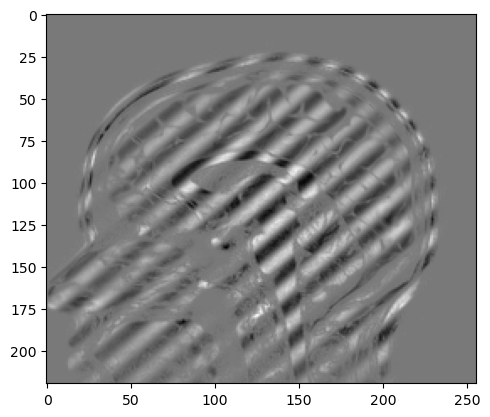

In [8]:
import scipy.fft
import skimage as ski
brain = ski.io.imread("brain.png", as_gray=True)
transformed_image = scipy.fft.fft2(brain)
transformed_image[10,10] += 10000000000
bad_retransformed_image = scipy.fft.ifft2(transformed_image)
plt.imshow(np.abs(bad_retransformed_image), cmap="gray")



b) Erklärt kurz, wie es sich auf ein Bild auswirkt, wenn die Werte im Frequenzraum ein wenig nach rechts verschoben werden. Macht es hier einen Unterschied, ob man das Bild (wie üblich) als Betrag der Rücktransformierten rekonstruiert oder als deren Realteil? Illustriert Eure Antwort wieder mit einem entsprechenden Experiment. Nutzt dabei gern eine ganzzahlige Verschiebung, damit Ihr nicht interpolieren müsst. (5P)  
_Tipp:_ Denkt an Aufgabe 2a) von Blatt 3!


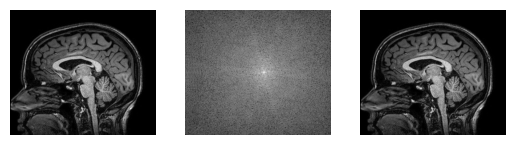

In [ ]:
brain = ski.io.imread("brain.png", as_gray=True)
transformed_image = scipy.fft.fft2(brain)
shifted_image = np.fft.fftshift(transformed_image)
shifted_image = np.roll(shifted_image, shift=10, axis=1)
bad_retransformed_image = scipy.fft.ifft2(unshifted_image)

# plt.subplot(1, 3, 1)
# plt.imshow(brain, cmap="gray")
# plt.axis("off")

# plt.subplot(1, 3, 2)
# plt.imshow(np.log(1 + np.abs(shifted_image)), cmap="gray")
# plt.axis("off")

# plt.subplot(1, 3, 3)
# plt.imshow(np.abs(bad_retransformed_image), cmap="gray")
# plt.axis("off")

# plt.show()


_Antwort und Lösung:_

c) Werden die Werte im Frequenzraum durch additives Gauss-Rauschen gestört, hat auch dies Auswirkungen auf die rekonstruierten Bilder. Insbesondere sind Werte im Hintergrund dann in der Regel nicht mehr genau Null. Visualisiert diesen Effekt, indem Ihr das Bild ```brain.png``` Fourier-transformiert, Gauss-Rauschen auf Real- und Imaginärteile addiert und den Betrag der Rücktransformierten betrachtet. Visualisiert sowohl das gestörte Bild als auch ein Histogramm der Voxel, die ursprünglich genau Null waren. (5P)

_Lösung:_